# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [2]:
# Set up Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the Mars facts website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
all_rows = soup.find_all('tr', class_='data-row')

# Print first three rows to confirm success 
all_rows[:3]

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
weather_data = []

# Loop through the scraped data to create a list of rows
# Loop through all rows 
for row in all_rows: 
    mars_data = row.find_all('td')

    # Loop through each column 
    row_list = []
    for i in range(0,7):

        # Append column data to list of rows 
        row_list.append(mars_data[i].text)

    # Append list of rows data to overall weather data 
    weather_data.append(row_list)

# Print first five rows to confirm success 
weather_data[:5]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
mars_weather_df = pd.DataFrame(weather_data, columns = column_names)

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime([x for x in mars_weather_df['terrestrial_date']])
mars_weather_df[['sol', 'ls', 'month']] = mars_weather_df[['sol','ls','month']].astype('int64')
mars_weather_df[['min_temp','pressure']] = mars_weather_df[['min_temp','pressure']].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Use groupby to count the number of instances for earch Martian month 
months_count = mars_weather_df.groupby('month')['month'].count()
months_count

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
# Use len function to get number of rows of data 
Martian_days = len(mars_weather_df)
Martian_days

1867

In [14]:
# 3. What is the average low temperature by month?
# Use groupby to find avg minimum temperature per Martian month 
avg_low_temp = mars_weather_df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

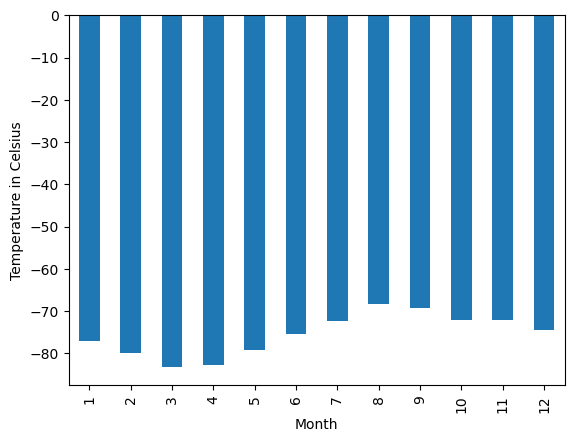

In [30]:
# Plot the average low temperature by month, label x and y 
avg_temp_chart = avg_low_temp.plot(kind='bar')
avg_temp_chart.set_xlabel("Month")
avg_temp_chart.set_ylabel("Temperature in Celsius")

# Save an image of the chart and print it to the screen
plt.savefig('Figures/Fig1_avg_low_temp.png', bbox_inches='tight')
plt.show()

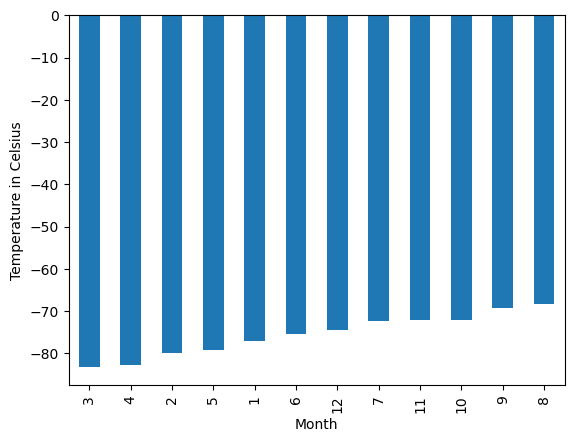

In [29]:
# Identify the coldest and hottest months in Curiosity's location
monthly_temp_asc = avg_low_temp.sort_values(ascending=True)
monthly_temp_chart = monthly_temp_asc.plot(kind='bar')
monthly_temp_chart.set_xlabel("Month")
monthly_temp_chart.set_ylabel("Temperature in Celsius")

# Save an image of the chart and print it to the screen
plt.savefig('Figures/Fig2_avg_temp_asc.png', bbox_inches='tight')
plt.show()

In [17]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

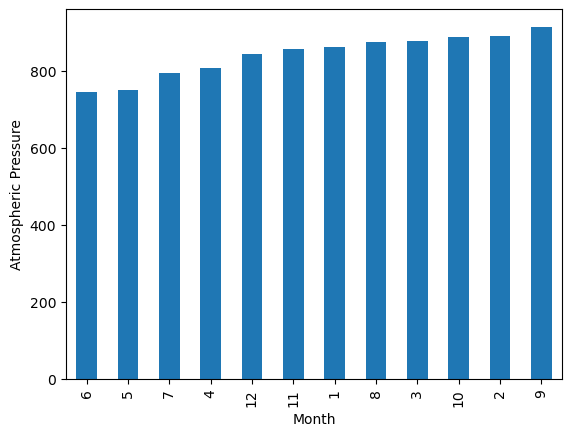

In [28]:
# Plot the average pressure by month
monthly_pressure_asc = avg_pressure.sort_values(ascending=True)
monthly_pressure_chart = monthly_pressure_asc.plot(kind='bar')
monthly_pressure_chart.set_xlabel("Month")
monthly_pressure_chart.set_ylabel("Atmospheric Pressure")

# Save an image of the chart and print it to the screen
plt.savefig('Figures/Fig3_avg_pressure_asc.png', bbox_inches='tight')
plt.show()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Use .copy() numpy function to create a copy of the filtered DataFrame 
earth_day_count = mars_weather_df[['terrestrial_date', 'min_temp']].copy()
earth_day_count

,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


In [20]:
# Find the first date recorded in the dataset 
mission_start_date = earth_day_count['terrestrial_date'].iloc[0]
mission_start_date 

Timestamp('2012-08-16 00:00:00')

In [21]:
# Subtract the first recorded date from the subsequent dates in the dataset to get number of days between each date  
earth_day_count['terrestrial_days'] = (earth_day_count['terrestrial_date'] - mission_start_date).dt.days
earth_day_count

,terrestrial_date,min_temp,terrestrial_days
0,2012-08-16,-75.0,0
1,2012-08-17,-76.0,1
2,2012-08-18,-76.0,2
3,2012-08-19,-74.0,3
4,2012-08-20,-74.0,4
...,...,...,...
1862,2018-02-23,-78.0,2017
1863,2018-02-24,-77.0,2018
1864,2018-02-25,-76.0,2019
1865,2018-02-26,-77.0,2020


In [22]:
# Identify longitude of first location (Curiosity)
first_long = mars_weather_df['ls'].loc[0]

# Find subsequent rows where longitude matches that of first location 
#   (how long did it take to return to that same longitude = Martian year)
same_long= mars_weather_df.loc[mars_weather_df['ls']==first_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [23]:
# Calculate the count in earth days between when first longitude is recorded and when the same longitude appears next
first_day = same_long['terrestrial_date'].loc[0]
date_after_one_martian_year = same_long['terrestrial_date'].iloc[1]
one_martian_year = date_after_one_martian_year - first_day
print(f"One Martian Year is equivalent to {one_martian_year} days on Earth")

One Martian Year is equivalent to 686 days 00:00:00 days on Earth


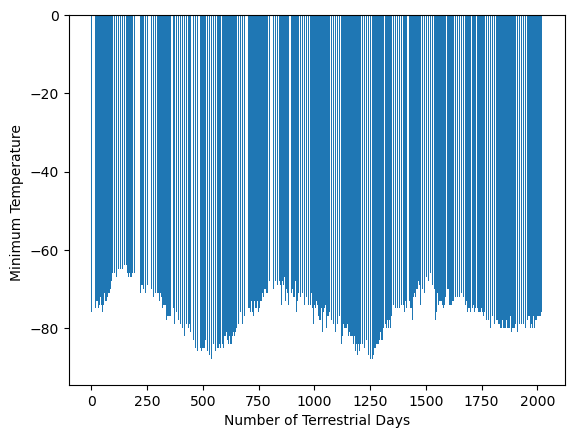

In [27]:
# Plot the daily minimum temperature
plt.bar(earth_day_count['terrestrial_days'], earth_day_count['min_temp'])
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature ")

# Save an image of the chart and print it to the screen
plt.savefig('Figures/Fig4_daily_min_temp.png', bbox_inches='tight')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

A year on Mars is roughly 686 days according to the data. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
mars_weather_df.to_csv('Data_Export/mars_weather_data.csv', index=False)

In [26]:
# Quit the browsing session
browser.quit()